Instrucciones:

Generar un Notebook Colab con código y resultados, que contiene información de autos de un periodo de tiempo. Resolver los siguientes:

- Limpieza y tratamiento de las variables (Según corresponda)
- Generar 5 nuevas variables aplicando los siguientes criterios con las variables numéricas:
1. Log10(var1/var2)
2. Sqrt(var1)*exp(var2)/200
3. Si var 1 > var 2 → 5, caso contrario 3
4. 1/logn(var1/var2)*100
5. var2**2/var1


Importamos nuestras librerias

In [1]:
import pandas as pd
import numpy as np

Treamos nuestro archivo csv con el cual vamos a trabajar

In [2]:
from google.colab import files
files.upload()

Saving autos.csv to autos.csv


{'autos.csv': b"Millas_Por_Galon;Cilindros;Pais_Origen;Peso_En_Libras;Desplazamiento;Aceleracion;Nombre;Anyo;Caballo_De_Fuerza\r\n18;8;USA;3504;307;12;chevrolet chevelle malibu;1/01/1970;130\r\n15;8;USA;3693;350;11.5;buick skylark 320;1/01/1970;165\r\n18;8;USA;3436;318;11;plymouth satellite;1/01/1970;150\r\n16;8;USA;3433;304;12;amc rebel sst;1/01/1970;150\r\n17;8;USA;3449;302;10.5;ford torino;1/01/1970;140\r\n15;8;USA;4341;429;10;ford galaxie 500;1/01/1970;198\r\n14;8;USA;4354;454;9;chevrolet impala;1/01/1970;220\r\n14;8;USA;4312;440;8.5;plymouth fury iii;1/01/1970;215\r\n14;8;USA;4425;455;10;pontiac catalina;1/01/1970;225\r\n15;8;USA;3850;390;8.5;amc ambassador dpl;1/01/1970;190\r\nNA;4;Europe;3090;133;17.5;citroen ds-21 pallas;1/01/1970;115\r\nNA;8;USA;4142;350;11.5;chevrolet chevelle concours (sw);1/01/1970;165\r\nNA;8;USA;4034;351;11;ford torino (sw);1/01/1970;153\r\nNA;8;USA;4166;383;10.5;plymouth satellite (sw);1/01/1970;175\r\nNA;8;USA;3850;360;11;amc rebel sst (sw);1/01/1970;17

Leemos nuestro archivo en el cual toda la informacion del archivo de encuentra en una misma columna por lo que al momento de leerlo usamos "sep" para delimitar por el separador ";" cada columna de los datos

In [3]:
data_autos = pd.read_csv('autos.csv', sep=";")
data_autos.head(3)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0


Verificamos el tipo de dato de nuestras columnas

In [4]:
data_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


Revisamos cuantos valores nulos tenemos en cada columna

In [5]:
data_autos.isnull().sum()

Millas_Por_Galon     8
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
Caballo_De_Fuerza    6
dtype: int64

Le damos tratamiento a estos valores nulos dandoles el promedio de los valores de sus respectivas columnas

In [6]:
data_autos["Millas_Por_Galon"].fillna(np.mean(data_autos["Millas_Por_Galon"]), inplace = True)
data_autos["Caballo_De_Fuerza"].fillna(np.mean(data_autos["Caballo_De_Fuerza"]), inplace = True)
data_autos.isnull().sum()


Millas_Por_Galon     0
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
Caballo_De_Fuerza    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Verificamos si tenemos datos atipicos por lo que primeramente creamos un segundo dataframe que solo contenga las columnas con datos numericos no ordinales

In [9]:
# Data numérica
# 'Millas_Por_Galon', 'Peso_En_Libras', 'Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza'
data_autos_numerica = data_autos.loc[:, ['Millas_Por_Galon', 'Peso_En_Libras', 'Desplazamiento', 'Aceleracion', 'Caballo_De_Fuerza']] 
data_autos_numerica.head(2)

,Millas_Por_Galon,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza
0,18.0,3504,307.0,12.0,130.0
1,15.0,3693,350.0,11.5,165.0


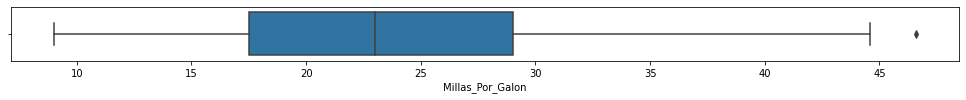

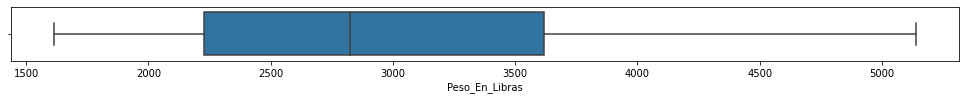

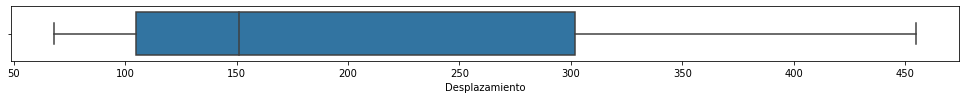

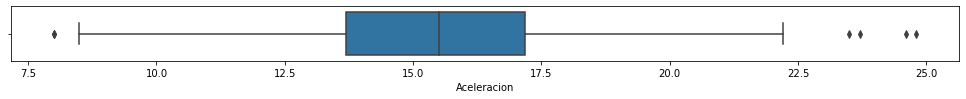

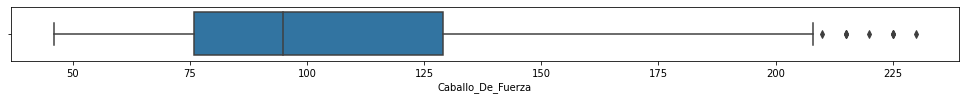

In [10]:
#data_autos.plot(kind = 'box' )

for column in data_autos_numerica:
        plt.figure(figsize=(17,1))
        sns.boxplot(data = data_autos_numerica, x=column)

Se detectaron algunos valores que han salido de los boxplot pero debido al contexto no se considerara sean eliminados dado que son valores posibles.

In [11]:
data_autos.tail(2)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1/01/1982,79.0
405,31.0,4,USA,2720,119.0,19.4,chevy s-10,1/01/1982,82.0


Mediante la libreria "datatime" cambiamos el tipo de dato de la columna "Anyo" para que sea de tipo "datetime"

In [12]:
from datetime import datetime


In [13]:
data_autos["Anyo"] = data_autos.Anyo.apply( lambda x : datetime.strptime(x, '%d/%m/%Y'))
data_autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Millas_Por_Galon   406 non-null    float64       
 1   Cilindros          406 non-null    int64         
 2   Pais_Origen        406 non-null    object        
 3   Peso_En_Libras     406 non-null    int64         
 4   Desplazamiento     406 non-null    float64       
 5   Aceleracion        406 non-null    float64       
 6   Nombre             406 non-null    object        
 7   Anyo               406 non-null    datetime64[ns]
 8   Caballo_De_Fuerza  406 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 28.7+ KB


Vemos los cambios en nuestra columna "Anyo"

In [14]:
data_autos.head(2)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1970-01-01,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1970-01-01,165.0


Para trabajar con algunas de nuestra nuevas columnas importaremos la libreria "math"

Nuevas columnas: 

1. Log10(var1/var2)
2. Sqrt(var1)*exp(var2)/200
3. Si var 1 > var 2 → 5, caso contrario 3
4. 1/logn(var1/var2)*100
5. var2**2/var1

In [15]:
import math

In [16]:
var1 = data_autos.Caballo_De_Fuerza
var2 = data_autos.Aceleracion

data_autos["Columna1"] = [math.log10(var1[i]/var2[i]) for i in range (len(data_autos))]
data_autos["Columna2"] = [(math.sqrt(var1[i])*math.exp(var2[i])/200) for i in range (len(data_autos))]                                    
data_autos["Columna3"] = [5 if var1[i] > var2[i] else 3 for i in range (len(data_autos))]
data_autos["Columna4"] = [(1/math.log(var1[i]/var2[i])*100) for i in range (len(data_autos))]
data_autos["Columna5"] = [math.pow(var2[i],2)/var1[i] for i in range (len(data_autos))]

data_autos

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,Columna1,Columna2,Columna3,Columna4,Columna5
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1970-01-01,130.0,1.034762,9.278451e+03,5,41.970466,1.107692
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1970-01-01,165.0,1.156786,6.340135e+03,5,37.543197,0.801515
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1970-01-01,150.0,1.134699,3.666527e+03,5,38.273996,0.806667
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,1970-01-01,150.0,1.096910,9.966655e+03,5,39.592535,0.960000
4,17.0,8,USA,3449,302.0,10.5,ford torino,1970-01-01,140.0,1.124939,2.148454e+03,5,38.606056,0.787500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,27.0,4,USA,2790,140.0,15.6,ford mustang gl,1982-01-01,86.0,0.741374,2.761933e+05,5,58.579687,2.829767
402,44.0,4,Europe,2130,97.0,24.6,vw pickup,1982-01-01,52.0,0.325068,1.740267e+09,5,133.601021,11.637692
403,32.0,4,USA,2295,135.0,11.6,dodge rampage,1982-01-01,84.0,0.859821,4.999489e+03,5,50.509854,1.601905
404,28.0,4,USA,2625,120.0,18.6,ford ranger,1982-01-01,79.0,0.628114,5.316930e+06,5,69.142605,4.379241
